### Setup

#### Libraries

In [107]:
!./venv/bin/pip install pandas matplotlib seaborn numpy scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


#### Imports

In [144]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris, load_digits
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Subtask 1

#### Load Dataset

In [12]:
iris = load_iris()

2D plots

In [ ]:
def plot_iris_2d(ax, data, x1=0, x2=1, title="Graph"):
    scatter = ax.scatter(data[:, x1], data[:, x2], c=iris.target)
    ax.set(xlabel=iris.feature_names[x1], ylabel=iris.feature_names[x2], title=title)
    _ = ax.legend(
        scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
    ) 

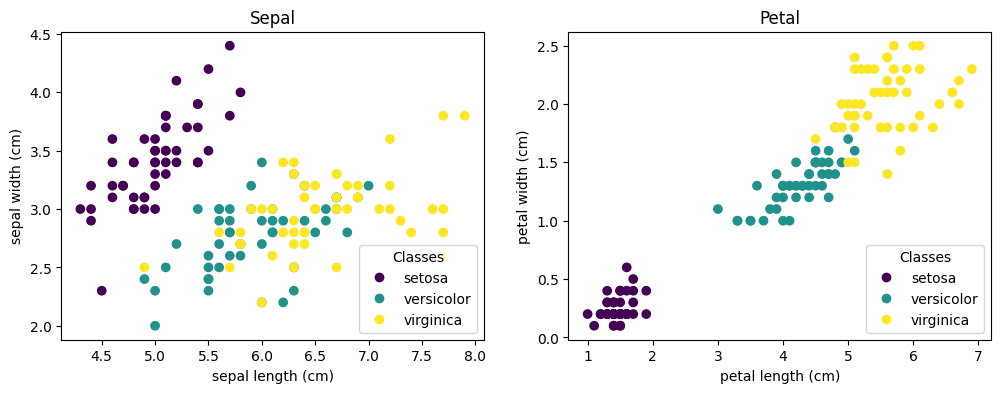

In [106]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
plot_iris_2d(ax1, iris.data, x1=0, x2=1, title="Sepal")
plot_iris_2d(ax2, iris.data, x1=2, x2=3, title="Petal")

3D plots

[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

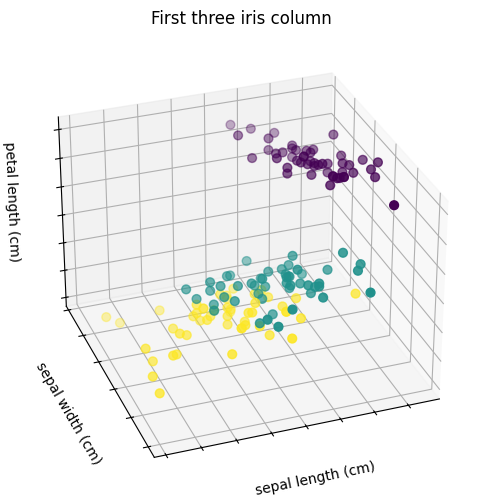

In [102]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    iris.data[:, 0],
    iris.data[:, 1],
    iris.data[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three iris column")
ax.set_xlabel(iris.feature_names[0])
ax.xaxis.set_ticklabels([])
ax.set_ylabel(iris.feature_names[1])
ax.yaxis.set_ticklabels([])
ax.set_zlabel(iris.feature_names[2])
ax.zaxis.set_ticklabels([])

Sigmoid's PCA Implementation

In [50]:
class myPCA:
  def __init__(self, n_components = 2, method = 'svd'):
    self.n_components = n_components
    if method in ['svd', 'eigen']:
      self.__method = method
    else:
      raise ValueError(f"'{method}' is not a method implemented in this model")

  def fit(self, X):
    if self.__method == 'svd':
      U, S, V = np.linalg.svd(X)
      self.V = V[:self.n_components, :].T
    elif self.__method == 'eigen':
      corr_matrix = np.corrcoef(X.T)
      self.eig_vals, self.eig_vecs = np.linalg.eig(corr_matrix)
      self.eig_pairs = [(np.abs(self.eig_vals[i]), self.eig_vecs[:, i]) for i in range(len(self.eig_vals))]
      self.eig_pairs.sort(key=lambda a: a[0], reverse=True)
      total = np.sum(self.eig_vals)
      self.explained_variance_ratio = [i/total*100 for i in sorted(self.eig_vals, reverse=True)]
      # self.matrix_w = np.hstack(self.eig_pairs[i][1].reshape(np.size(X, 1), 1) for i in range(self.n_components))
      self.matrix_w = np.column_stack([self.eig_pairs[i][1] for i in range(self.n_components)])
    return self

  def transform(self, X):
    if self.__method == 'svd':
      return X.dot(self.V)
    elif self.__method == 'eigen':
      return X.dot(self.matrix_w)

Creating PCA instances

In [51]:
mypca_svd = myPCA(n_components=2, method="svd")
mypca_eigen = myPCA(n_components=2, method="eigen")
pca = PCA(n_components=2)

Applying scaler

In [45]:
scaler = StandardScaler()
X = scaler.fit_transform(iris.data)
X.std(), X.mean()

(np.float64(1.0), np.float64(-1.4684549872375404e-15))

Fitting the PCAs

In [127]:
mypca_svd.fit(X)
mypca_eigen.fit(X)
pca.fit(X)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",2
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized SVD 

Transforming the data

In [53]:
dataset_svd = mypca_svd.transform(X)
dataset_eigen = mypca_eigen.transform(X)
dataset_sklearn = pca.transform(X)

Plotting PCAs

sklearn PCA's transformation is mirrored along both axes but it is fine

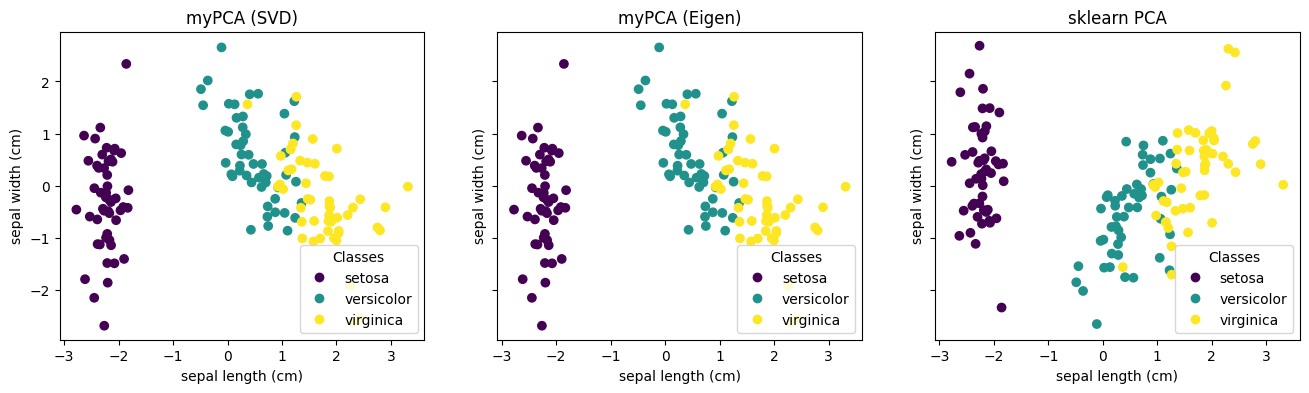

In [91]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4), sharex=True, sharey=True)

plot_iris_2d(axs[0], dataset_svd,     title="myPCA (SVD)")
plot_iris_2d(axs[1], dataset_eigen,   title="myPCA (Eigen)")
plot_iris_2d(axs[2], dataset_sklearn, title="sklearn PCA")

Difference between PCA results

In [92]:
np.sum(dataset_svd - dataset_eigen)

np.float64(-6.597153379139797e-15)

In [93]:
np.sum(dataset_svd - dataset_sklearn)

np.float64(-7.105427357601002e-15)

Plots are visually identical, the difference in the results between the implementations is very low.

Before PCA, setosa (purple) class could be separated by a hyperplan from the other two. After PCA, setosa class is linearly separable from the other two classes.

The overlap between versicolor (green) and virginica (yellow) classes remains, but the data from the two classes did not become more entagled, so the classifying performance of the model should not be significantly affected.

#### One Principal Component

In [115]:
pca_1 = PCA(n_components=1)
pca_1.fit(X)
dataset_1 = pca_1.transform(X)

Text(0.5, 0, 'PCA Value')

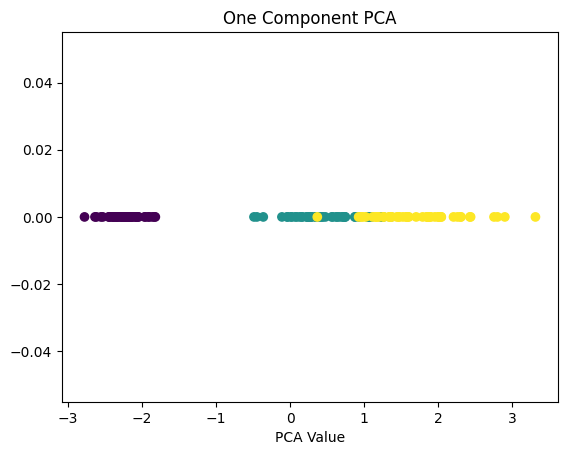

In [116]:
plt.scatter(dataset_1, np.zeros_like(dataset_1), c=iris.target)
plt.title("One Component PCA")
plt.xlabel("PCA Value")

Explained Varience Ratio Plot

In [143]:
mypca_eigen.explained_variance_ratio

[np.float64(72.96244541329987),
 np.float64(22.850761786701764),
 np.float64(3.668921889282866),
 np.float64(0.5178709107154852)]

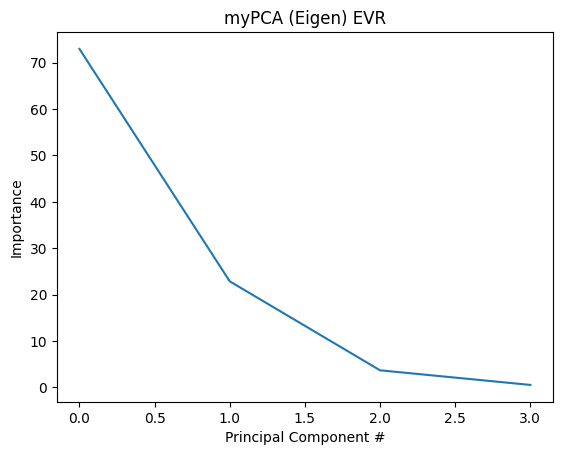

In [142]:
plt.title("myPCA (Eigen) EVR")
plt.xlabel("Principal Component #")
plt.ylabel("Importance")
plt.plot(mypca_eigen.explained_variance_ratio)

The first principal component has the highest importance of about 72. Second one has a lower importance of about 22, and the others are about 3.5 and 0.5. We can make a conclusion that having two principal components is enough to capture about 95% of the data variance, so we reduce the dimensionality by two out of four columns. Another possibility would be to reduce the dimensionality to just one, which would capture 72% of variance.

### Subtask 2

Load Dataset

In [169]:
digits = load_digits()

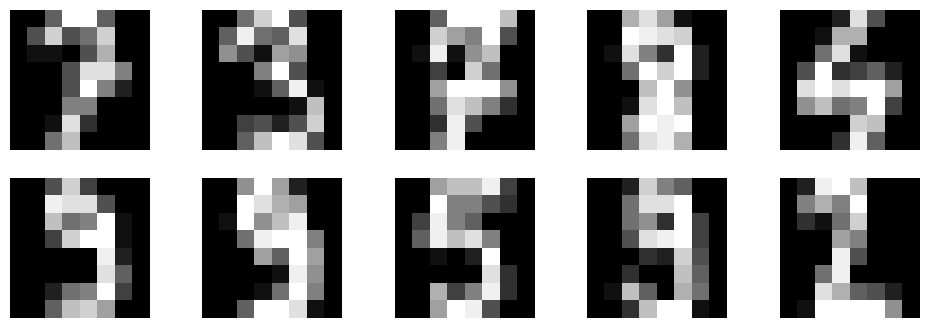

In [168]:
fig, axs = plt.subplots(2, 5, figsize=(12, 4), sharex=True, sharey=True)

for ax_row in axs:
    for ax in ax_row:
        rand_int = np.random.randint(len(digits.data))

        ax.set_axis_off()
        ax.imshow(digits.images[rand_int], cmap="gray")

Scaling the dataset

In [182]:
digits_scaler = StandardScaler()
digits_scaled = digits_scaler.fit_transform(digits.data)

#### 2D Version

Applying PCA

In [183]:
digit_pca = PCA(n_components=2)

digit_pca.fit(digits_scaled)

transformed_digits = digit_pca.transform(digits_scaled)

print("n_components before:")
print(len(digits_scaled[0]))

print("n_components after:")
print(len(transformed_digits[0]))

n_components before:
64
n_components after:
2


Plotting the PCA-ed data

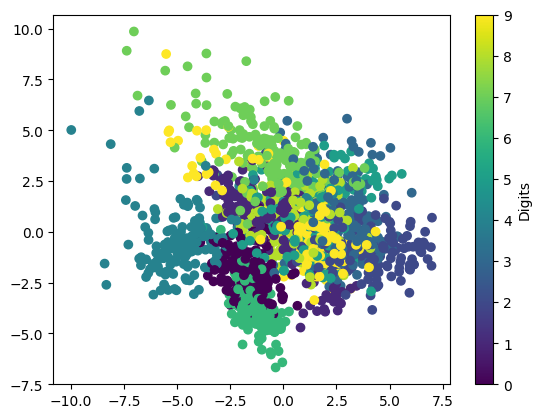

In [184]:
digits_plt = plt.scatter(transformed_digits[:, 0], transformed_digits[:, 1], c=digits.target)
plt.colorbar(digits_plt, label='Digits')

We have reduced the number of principal components from 64 to 2. That is a substantial reduction, and we can see that the PCA-ed data is overlapping, with some classes barely visible. Let us see the explained variance ratio to see how much variance we capture

In [ ]:
digit_pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [186]:
np.sum(digit_pca.explained_variance_ratio_)

np.float64(0.2159497050083279)

We capture only 21% of variance across the dataset, which is quite low. Let us try to reduce to 3 principal components, to be able to visualize in 3D and see if we can get better variance out of that.

#### 3D version

In [190]:
digit_pca_3d = PCA(n_components=3)

digit_pca_3d.fit(digits_scaled)

transformed_digits_3d = digit_pca_3d.transform(digits_scaled)

print("n_components before:")
print(len(digits_scaled[0]))

print("n_components after:")
print(len(transformed_digits_3d[0]))

n_components before:
64
n_components after:
3


Text(0.5, 0.92, 'Digits Dataset with 3 PCs')

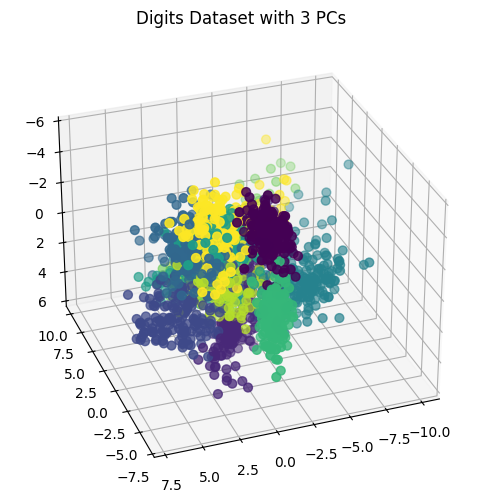

In [192]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    transformed_digits_3d[:, 0],
    transformed_digits_3d[:, 1],
    transformed_digits_3d[:, 2],
    c=digits.target,
    s=40,
)

ax.set_title("Digits Dataset with 3 PCs")

In 3D it looks a tiny bit better, but still there can be seen overlaps with multiple classes. Let us see the EVR

In [193]:
digit_pca_3d.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415])

In [194]:
np.sum(digit_pca_3d.explained_variance_ratio_)

np.float64(0.3003938539345733)

We got an 8.5% boost in captured variance, so with 3 principal components it captures 30% of dataset variance. Obviously, more principal components yields larger explained variance.